In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
def get_exp_path(expid):
    expid = str(expid)
    logs_folder = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis")/"logs"
    matches = Path(logs_folder).rglob(expid) #Get folder in logs_folder that matches expid
    matches_list = list(matches)
    if not len(matches_list) == 1:
        raise ValueError(f"There exists none or more than 1 folder with "
                            f"experiment id {expid} in the {logs_folder.name} "
                            "directory!")
    exp_dir = matches_list[0]
    return exp_dir

In [3]:
def load_df(expid_path, metric):
    if metric == "balacc":
        imp_path = expid_path/"results/importance_full/balaccmeandiff_sorted.csv"
        print("Reading", imp_path.name, "...")
        imp_df = pd.read_csv(imp_path, index_col=0, header=1, usecols=["Unnamed: 0", "MeanDiffOrigPerm"])
    elif metric == "return":
        imp_path = expid_path/"results/importance_full/meanofmeandiffpf_sorted.csv"
        print("Reading", imp_path.name, "...")
        imp_df = pd.read_csv(imp_path, index_col=0, header=1, usecols=["Unnamed: 0", "MomDiff"])
    else:
        raise NotImplementedError("Please specify a valid metric.")
    return imp_df
    

In [4]:
def get_all_dfs(expid_ls, metric):
    ls_df = []
    col_names = {"lin": "LR", "rf": "RF", "xgb": "GBT", "nn": "NN", "transformer": "TF"}
    for expid in expid_ls:
        p = get_exp_path(expid)
        print("Model:", p.parent.parent.name,",", p.parent.name)
        df = load_df(p, metric=metric )
        df = df / df.sum() #normalize
        df.columns = [p.parent.name]
        df = df.rename(columns=col_names)
        ls_df.append(df)
    return ls_df

In [5]:
def get_feat_importances(features, metric):
    feature_expid_map = {"option": [20220919194922, 20220919213409, 20220919200811, 20220908133630, 20220915074003],
                        "option+stock": [20220922192602, 20220923123700, 20220924104656, 20220920100736, 20220923074741]}
    dfs = get_all_dfs(feature_expid_map[features], metric=metric)
    return dfs #list

### 1. Determine features

In [6]:
features = "option+stock"

### 2. Define metric:

In [7]:
metric = "balacc"

### 3. Produce dataframe

In [8]:
ls_df = get_feat_importances(features=features, metric=metric)

Model: medium , lin
Reading balaccmeandiff_sorted.csv ...
Model: medium , rf
Reading balaccmeandiff_sorted.csv ...
Model: medium , xgb
Reading balaccmeandiff_sorted.csv ...
Model: medium , nn
Reading balaccmeandiff_sorted.csv ...
Model: medium , transformer
Reading balaccmeandiff_sorted.csv ...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [11]:
[i for i in list(plt.rcParams.keys()) if "box" in i]

['boxplot.bootstrap',
 'boxplot.boxprops.color',
 'boxplot.boxprops.linestyle',
 'boxplot.boxprops.linewidth',
 'boxplot.capprops.color',
 'boxplot.capprops.linestyle',
 'boxplot.capprops.linewidth',
 'boxplot.flierprops.color',
 'boxplot.flierprops.linestyle',
 'boxplot.flierprops.linewidth',
 'boxplot.flierprops.marker',
 'boxplot.flierprops.markeredgecolor',
 'boxplot.flierprops.markeredgewidth',
 'boxplot.flierprops.markerfacecolor',
 'boxplot.flierprops.markersize',
 'boxplot.meanline',
 'boxplot.meanprops.color',
 'boxplot.meanprops.linestyle',
 'boxplot.meanprops.linewidth',
 'boxplot.meanprops.marker',
 'boxplot.meanprops.markeredgecolor',
 'boxplot.meanprops.markerfacecolor',
 'boxplot.meanprops.markersize',
 'boxplot.medianprops.color',
 'boxplot.medianprops.linestyle',
 'boxplot.medianprops.linewidth',
 'boxplot.notch',
 'boxplot.patchartist',
 'boxplot.showbox',
 'boxplot.showcaps',
 'boxplot.showfliers',
 'boxplot.showmeans',
 'boxplot.vertical',
 'boxplot.whiskerprops.col

### Write axes labels in latex font

In [12]:
#Latex Font? #xtick labelsize?
plt.rcParams.update({
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "Computer Modern",
})

### Use sns colorblind palette

In [13]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [14]:
sns.color_palette("colorblind", as_cmap=True)

['#0173B2',
 '#DE8F05',
 '#029E73',
 '#D55E00',
 '#CC78BC',
 '#CA9161',
 '#FBAFE4',
 '#949494',
 '#ECE133',
 '#56B4E9']

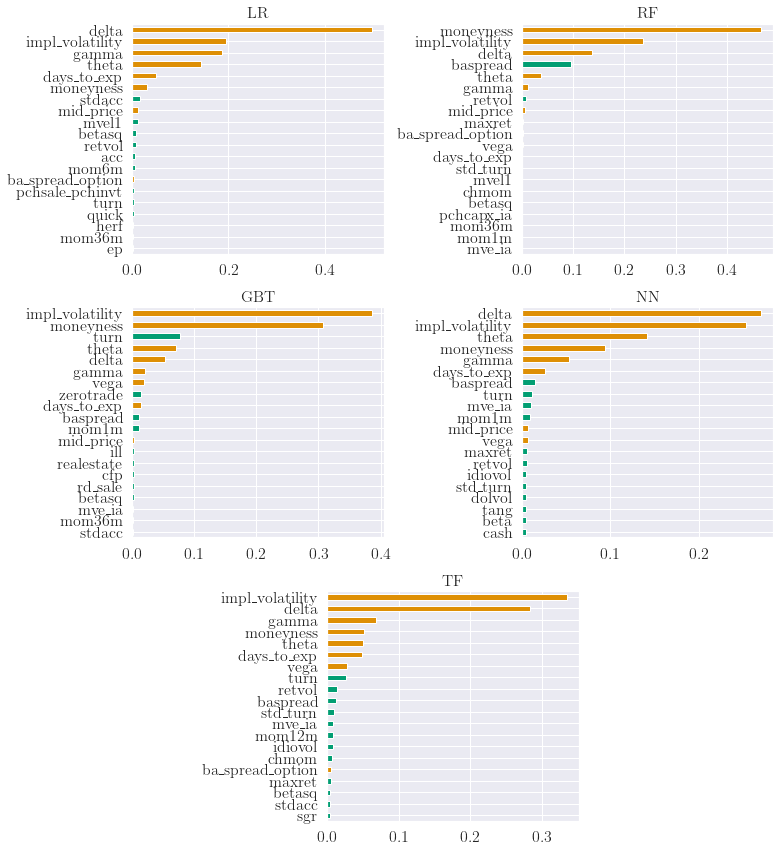

In [18]:
# Plot feature importances
fig, axes = plt.subplots(6, 2, figsize=(11,12))

ax1 = plt.subplot2grid(shape=(3,4), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((3,4), (0,2), colspan=2)
ax3 = plt.subplot2grid((3,4), (1,0), colspan=2)
ax4 = plt.subplot2grid((3,4), (1,2), colspan=2)
ax5 = plt.subplot2grid((3,4), (2,1), colspan=2)

ls_ax = [ax1, ax2, ax3, ax4, ax5]

opt_features = ["ba_spread_option", "days_to_exp", "delta", "gamma", "impl_volatility", "mid_price", "moneyness", 
                "open_interest", "theta", "vega", "volume"]

top = 20

for i, df in enumerate(ls_df):
    df_top = df.iloc[:top][::-1]
    m = df_top.index.isin(opt_features).reshape(-1, 1)    
    ax = df_top.plot(kind='barh', color="#DE8F05", ax=ls_ax[i], title=list(df.columns)[0], legend=False)
#     plt.setp(ax.get_yticklabels(), bbox=dict(boxstyle='square, pad=0', fc='#ED7D31')) # Color stock features
    df_top.mask(m).plot(kind='barh', color='#029E73', ax=ax, legend=False)
#     plt.setp(ax.get_yticklabels(), bbox=dict(boxstyle='square, pad=-0.1', fc="#029E73", alpha=0.7)) # Color stock+option features
#     ytick_option = [i for i in ax.get_yticklabels() if i.get_text() in opt_features]
#     plt.setp(ytick_option, bbox=dict(boxstyle='square, pad=-0.1', fc="#DE8F05", alpha=0.7)) # Color option features
    

plt.tight_layout()
# plt.savefig('Feature_Importances4.png', dpi=800)

In [ ]:
df_top[::-1]

## Example

In [ ]:
ex = load_df(get_exp_path(20220924104656), "balacc")

In [ ]:
ex = ex / ex.sum()

In [ ]:
opt_features = ["ba_spread_option", "days_to_exp", "delta", "gamma", "impl_volatility", "mid_price", "moneyness", "open_interest", "theta", "vega", "volume"]

In [ ]:
m = ex.iloc[:20].index.isin(opt_features).reshape(-1, 1)

In [ ]:
ax = ex.iloc[:20].mask(~m).plot(kind='barh', color="#4472C4", legend=False)
ex.iloc[:20].mask(m).plot(kind='barh', color='#ED7D31', ax=ax, legend=False)

In [ ]:
ex.iloc[:30]